# Create Example Characters

## Show same character for each font

1. Old Style - Garamond
1. Transitional - Baskerville
1. Modern - Bodoni
1. Sans Serif - Arial

## Imports and Globals

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE

import font_utils.load_font as LF
import font_utils.upper_lower_numerals as ULN
import plot_utils.plot_font as PU
import sci_kit_learn_utils as SKU

## Read Fonts

In [9]:
FONT_DICT = {
    'garamond': {
        'variation': 'GARAMOND',
        'df': None
    },
    'baskerville': {
        'variation': 'BASKERVILLE OLD FACE',
        'df': None
    },
    'bodoni': {
        'variation': 'BODONI MT BLACK',
        'df': None
    },
    'arial': {
        'variation': 'ARIAL',
        'df': None
    }
}

for font, d in FONT_DICT.items():
    print(f'{font}')
    tf = LF.LoadFont(font).get_trimmed_font()
    d['df'] = tf[d['variation']]['df']
    for k,v in tf.items():
        c=v['min_char_count']
        print(f'  {k:25s} : {c}')

garamond
  GARAMOND                  : 2
baskerville
  BASKERVILLE OLD FACE      : 2
bodoni
  BODONI MT BLACK           : 2
arial
  scanned                   : 8
  ARIAL                     : 2
  ARIAL BLACK               : 2


## Show Example Character

1. iloc=0 is the normal weight example
1. iloc=1 is the bold weight example

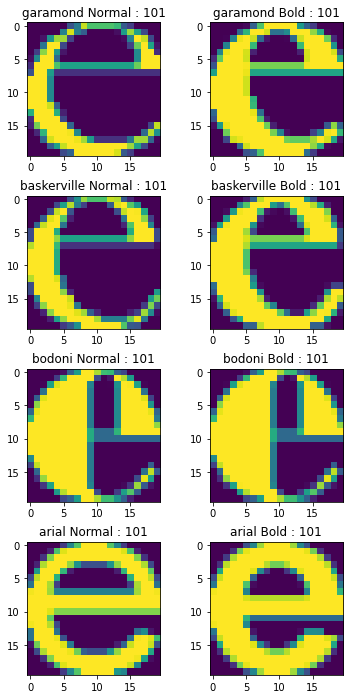

In [22]:
example_ltr = ord('e')
caption_str = ['Normal', 'Bold']

ex_rows=4
ex_cols=2
ex_fig_size = [6,12]

# create figure (fig), and array of axes (ax)
ex_fig, ex_ax = plt.subplots(nrows=ex_rows, ncols=ex_cols, figsize=ex_fig_size)
plt.subplots_adjust(hspace=0.3)

img_list = list()

for font, d in FONT_DICT.items():
    font_df = d['df']

    norm_ltr = font_df.loc[font_df.m_label == example_ltr].iloc[0]
    bold_ltr = font_df.loc[font_df.m_label == example_ltr].iloc[1]

    letters = [norm_ltr, bold_ltr]
    for ltr in letters:
        img = np.array(ltr[1:], dtype=np.uint8).reshape(20,20)
        img_list.append((f'{font}',img))
        
for i, axi in enumerate(ex_ax.flat):
    # i runs from 0 to (nrows*ncols-1)
    # axi is equivalent with ax[rowid][colid]
    axi.imshow(img_list[i][1])
    # get indices of row/column
    # write row/col indices as axes' title for identification
    axi.set_title(f'{img_list[i][0]} {caption_str[i%2]} : {example_ltr}')

plt.show()

ex_fig.savefig("example_chars.pdf", bbox_inches='tight')